## **Python Final Project**
---
**Group B Members:** Chaeyoung Gu, Ellington Chen, Rachel Kim, Rebecca Liu

- [Package Imports](#package-imports)
- [Load Data](#load-data)
- [Descriptive Analysis](#descriptive-analysis)
- [Supervised Machine Learning (Resort Hotel)](#rh-ml)
    - [Model Comparison](#rh-mc)
    - [Performance of top and bottom 5% of predicted results](#rh-five)
    - [SHAP](#rh-shap)
- [Supervised Machine Learning (City Hotel)](#ch-ml)
    - [Model Comparison](#ch-mc)
    - [Performance of top and bottom 5% of predicted results](#ch-five)
    - [SHAP](#ch-shap)


---


<a id='package-imports'></a>

### Package Imports

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import shap

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

<a id='load-data'></a>

### Load Data

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Check for missing values in initial data
round(1 - len(data.dropna())/len(data), 3)

0.998

In [8]:
round(data.isna().sum()/len(data), 3)

hotel                             0.000
is_canceled                       0.000
lead_time                         0.000
arrival_date_year                 0.000
arrival_date_month                0.000
arrival_date_week_number          0.000
arrival_date_day_of_month         0.000
stays_in_weekend_nights           0.000
stays_in_week_nights              0.000
adults                            0.000
children                          0.000
babies                            0.000
meal                              0.000
country                           0.004
market_segment                    0.000
distribution_channel              0.000
is_repeated_guest                 0.000
previous_cancellations            0.000
previous_bookings_not_canceled    0.000
reserved_room_type                0.000
assigned_room_type                0.000
booking_changes                   0.000
deposit_type                      0.000
agent                             0.137
company                           0.943


In [9]:
# Delete colomns with NAs and with no interpretable meaning
data = data.drop(columns = ['agent', 'company', 'reservation_status', 'reservation_status_date'])

In [10]:
data.shape

(119390, 28)

In [11]:
# Delete rows with NAs in the coutry column
data = data.dropna(axis=0, inplace=False)

In [12]:
data.shape

(118898, 28)

In [13]:
round(data.isna().sum()/len(data), 3)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [14]:
# Assign 'yes' and 'no' to dependent variable 'is_canceled'
data.loc[data.is_canceled == 1, 'is_canceled'] = 'yes'
data.loc[data.is_canceled == 0, 'is_canceled'] = 'no'

In [15]:
data.groupby('is_canceled').size()

is_canceled
no     74745
yes    44153
dtype: int64

<a id='descriptive-analysis'></a>

### Descriptive Analysis

In [16]:
# After initial cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
rh = data.loc[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 'no')]
ch = data.loc[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 'no')]

In [17]:
rh.shape

(28519, 28)

In [18]:
ch.shape

(46226, 28)

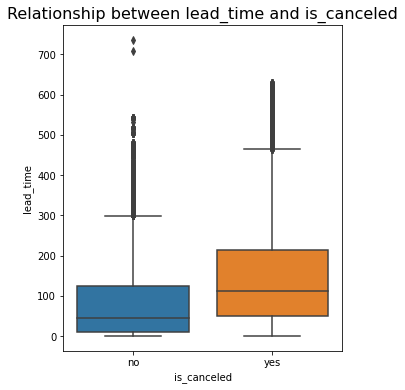

In [19]:
# Use boxplot to see the relationship between 'lead_time' and 'is_canceled'
plt.figure(figsize=(5,6))
plt.title('Relationship between lead_time and is_canceled', fontsize=16)
sns.boxplot(x = 'is_canceled', 
            y = 'lead_time',
            data = data);

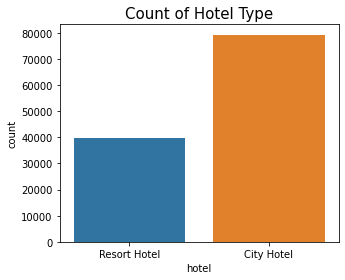

In [20]:
# Comparision of the counts of the reservations for two types of hotels
plt.figure(figsize=(5,4))
plt.title('Count of Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=data, x = 'hotel')
plt.show()

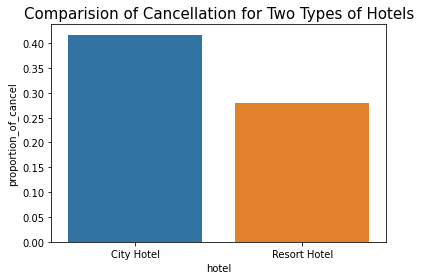

In [21]:
# Comparision of cancellation for two types of hotels
plotDat = (data.
           groupby(['hotel']).
           apply(lambda x: len(x.is_canceled[x.is_canceled == 'yes'])/len(x.is_canceled)).
           reset_index().
           rename(columns = {0: 'proportion_of_cancel'}))
plt.title('Comparision of Cancellation for Two Types of Hotels', fontdict = {'fontsize': 15})
sns.barplot(x = plotDat.hotel, y = plotDat.proportion_of_cancel);

In [22]:
# Create a dataframe of cancellation rate for different hotel types and different deposit types
plotDat = (data.
           groupby(['hotel','deposit_type']).
           apply(lambda x: len(x.is_canceled[x.is_canceled == 'yes'])/len(x.is_canceled)).
           reset_index().
           rename(columns = {0: 'proportion_of_cancel'}))
plotDat

,hotel,deposit_type,proportion_of_cancel
0,City Hotel,No Deposit,0.304570
1,City Hotel,Non Refund,0.998133
2,City Hotel,Refundable,0.700000
3,Resort Hotel,No Deposit,0.249238
4,Resort Hotel,Non Refund,0.959860
5,Resort Hotel,Refundable,0.154930


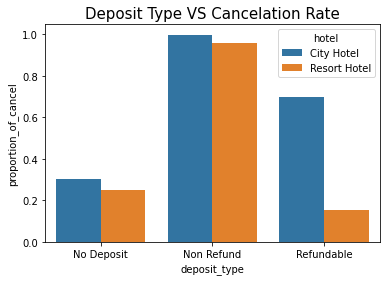

In [23]:
# Deposit Type vs Cancelation Rate
plt.title('Deposit Type VS Cancelation Rate', fontdict = {'fontsize': 15})
sns.barplot(data=plotDat, x='deposit_type', y='proportion_of_cancel',hue='hotel');

In [90]:
# The proportion of cancelation for Non Refund bookings is extremely high, so we want to take a look at the count of each category
data.groupby(['hotel', 'is_canceled', 'deposit_type']).size()

hotel         is_canceled  deposit_type
City Hotel    no           No Deposit      46196
                           Non Refund         24
                           Refundable          6
              yes          No Deposit      20232
                           Non Refund      12830
                           Refundable         14
Resort Hotel  no           No Deposit      28330
                           Non Refund         69
                           Refundable        120
              yes          No Deposit       9405
                           Non Refund       1650
                           Refundable         22
dtype: int64

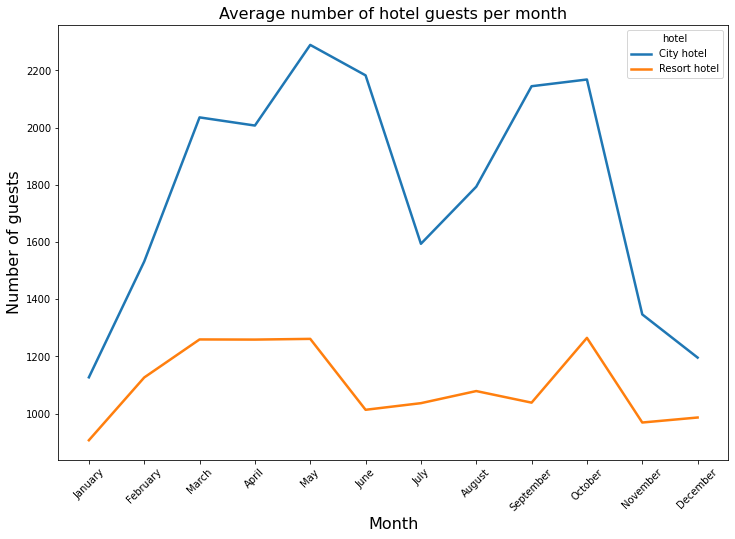

In [24]:
# Average number of hotel guests per month
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby('arrival_date_month')['hotel'].count()
city_guests_monthly = ch.groupby('arrival_date_month')['hotel'].count()

resort_guest_data = pd.DataFrame({'month': list(resort_guests_monthly.index),
                    'hotel': 'Resort hotel', 
                    'guests': list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({'month': list(city_guests_monthly.index),
                    'hotel': 'City hotel', 
                    'guests': list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# Order by month:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
full_guest_data['month'] = pd.Categorical(full_guest_data['month'], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data['month'] == 'July') | (full_guest_data['month'] == 'August'),
                    'guests'] /= 3
full_guest_data.loc[~((full_guest_data['month'] == 'July') | (full_guest_data['month'] == 'August')),
                    'guests'] /= 2

# Show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'month', y='guests', hue='hotel', data=full_guest_data, 
             hue_order = ['City hotel', 'Resort hotel'], size='hotel', sizes=(2.5, 2.5))
plt.title('Average number of hotel guests per month', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Number of guests', fontsize=16)
plt.show()

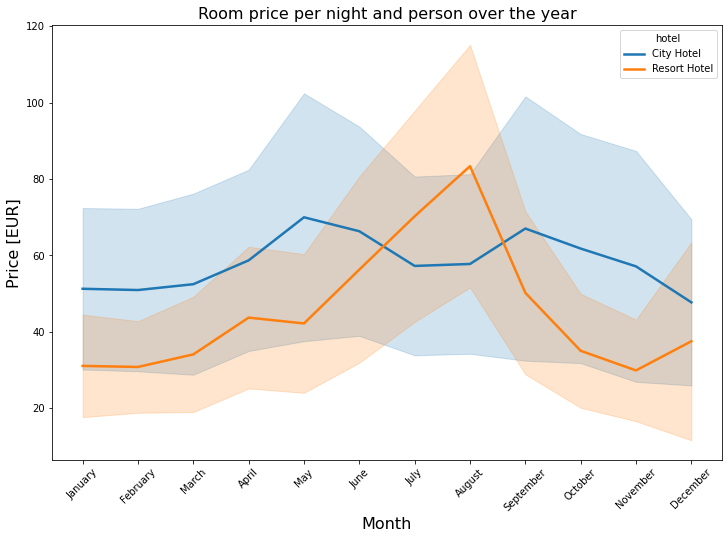

In [25]:
# Room price per night and person over the year
# Normalize price per night (adr):
data['adr_pp'] = data['adr'] / (data['adults'] + data['children'])
data_guests = data.loc[data['is_canceled'] == 'no'] # only actual gusts


# Grab data:
room_prices_mothly = data_guests[['hotel', 'arrival_date_month', 'adr_pp']].sort_values('arrival_date_month')

# Order by month:
room_prices_mothly['arrival_date_month'] = pd.Categorical(room_prices_mothly['arrival_date_month'], categories=ordered_months, ordered=True)

# Barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'arrival_date_month', y='adr_pp', hue='hotel', data=room_prices_mothly, 
            hue_order = ['City Hotel', 'Resort Hotel'], ci='sd', size='hotel', sizes=(2.5, 2.5))
plt.title('Room price per night and person over the year', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price [EUR]', fontsize=16)
plt.show()

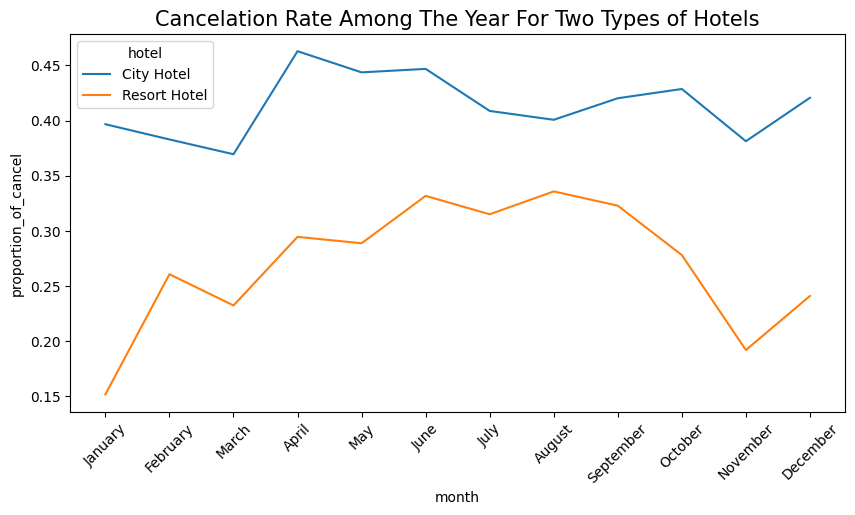

In [26]:
# Cancellation rate among different months for two types of hotels
data['month'] = pd.Categorical(data['arrival_date_month'], categories=ordered_months, ordered=True)
plotDat = (data.
           groupby(['hotel','month']).
           apply(lambda x: len(x.is_canceled[x.is_canceled == 'yes'])/len(x.is_canceled)).
           reset_index().
           rename(columns = {0: 'proportion_of_cancel'}))
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=plotDat, x= 'month', y = 'proportion_of_cancel', hue='hotel')
plt.title('Cancelation Rate Among The Year For Two Types of Hotels', fontdict = {'fontsize': 15})
plt.xticks(rotation=45,fontsize=10);

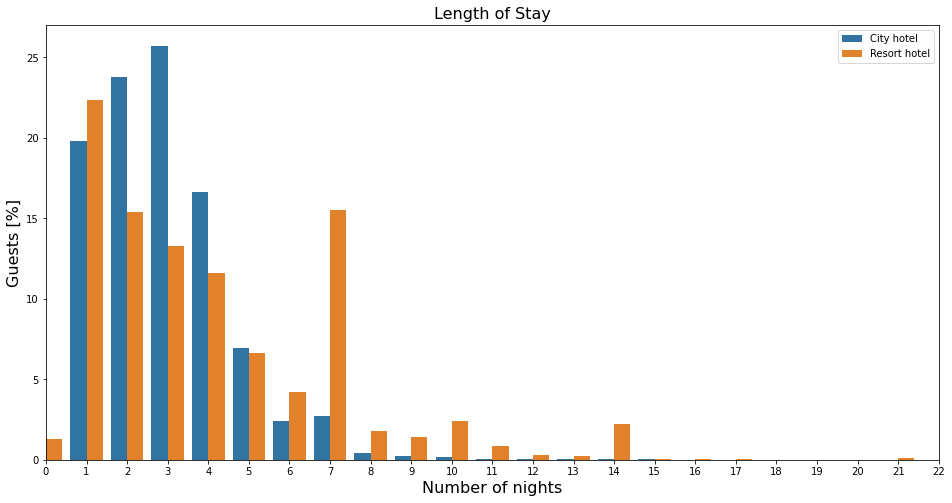

In [27]:
# Length of stay
# Create a DateFrame with the relevant data:
rh['total_nights'] = rh['stays_in_weekend_nights'] + rh['stays_in_week_nights']
ch['total_nights'] = ch['stays_in_weekend_nights'] + ch['stays_in_week_nights']

num_nights_res = list(rh['total_nights'].value_counts().index)
num_bookings_res = list(rh['total_nights'].value_counts())
rel_bookings_res = rh['total_nights'].value_counts() / sum(num_bookings_res) * 100 

num_nights_cty = list(ch['total_nights'].value_counts().index)
num_bookings_cty = list(ch['total_nights'].value_counts())
rel_bookings_cty = ch['total_nights'].value_counts() / sum(num_bookings_cty) * 100 

res_nights = pd.DataFrame({'hotel': 'Resort hotel',
                           'num_nights': num_nights_res,
                           'rel_num_bookings': rel_bookings_res})

cty_nights = pd.DataFrame({'hotel': 'City hotel',
                           'num_nights': num_nights_cty,
                           'rel_num_bookings': rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

# Show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = 'num_nights', y = 'rel_num_bookings', hue='hotel', data=nights_data,
            hue_order = ['City hotel', 'Resort hotel'])
plt.title('Length of Stay', fontsize=16)
plt.xlabel('Number of nights', fontsize=16)
plt.ylabel('Guests [%]', fontsize=16)
plt.legend(loc='upper right')
plt.xlim(0,22)
plt.show()

<a id='rh-ml'></a>

### Supervised Machine Learning (Resort Hotel)

In [28]:
# Drop 'adr_pp' column
data = data.drop(columns = ['adr_pp'])

In [29]:
# Seperate data into resort hotel and city hotel
rhDS = data.loc[data['hotel'] == 'Resort Hotel']
chDS = data.loc[data['hotel'] == 'City Hotel']

In [30]:
# Resort hotel
# Subsample 20000 records to do the analysis
df_Sub = rhDS.groupby('is_canceled').apply(lambda x: x.sample(10000, random_state = 345)).reset_index(drop=True)

In [31]:
# Check if the data is balanced
df_Sub.groupby('is_canceled').size()

is_canceled
no     10000
yes    10000
dtype: int64

In [32]:
# Set 75% of the data as traning dataset and 25% as testing dataset
TrainDS, TestDS = train_test_split(df_Sub, 
                               stratify = df_Sub.is_canceled,
                               test_size = 0.25, 
                               random_state = 345)

In [33]:
TrainDS.groupby('is_canceled').size()

is_canceled
no     7500
yes    7500
dtype: int64

In [34]:
# Check NAs
round(1 - len(TrainDS.dropna())/len(TrainDS), 3)

0.0

In [35]:
# Encode all categorical (or non-continuous) data in the training data into binary columns using sklearn's OneHotEncoder 
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'is_canceled').select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names_out(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_Enc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_Enc.head(5)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
5393,no,0,2016,11,6,1,0,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18009,yes,78,2015,41,9,1,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18259,yes,214,2015,40,3,1,1,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10112,yes,19,2017,7,13,1,0,2,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11645,yes,16,2017,3,17,0,1,2,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Use sklearn's VarianceThreshold function to remove any columns from the training data that happen to have zero variance at this point.
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_Enc.drop(columns = 'is_canceled')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_EncSel = pd.concat([TrainDS_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_EncSel.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
5393,no,0,2016,11,6,1,0,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18009,yes,78,2015,41,9,1,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18259,yes,214,2015,40,3,1,1,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10112,yes,19,2017,7,13,1,0,2,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11645,yes,16,2017,3,17,0,1,2,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Use sklearn's RobustScaler to scale all of the training data (except the target variable).
scaler = RobustScaler()

sca_raw_data_train = TrainDS_EncSel.drop(columns = 'is_canceled')

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

TrainDS_EncSelSca = pd.concat([TrainDS_EncSel.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

TrainDS_EncSelSca.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
5393,no,-0.506667,0.0,-0.772727,-0.6250,0.0,-0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18009,yes,0.013333,-1.0,0.590909,-0.4375,0.0,-0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18259,yes,0.920000,-1.0,0.545455,-0.8125,0.0,-0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10112,yes,-0.380000,1.0,-0.954545,-0.1875,0.0,-0.75,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11645,yes,-0.400000,1.0,-1.136364,0.0625,-0.5,-0.50,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
TrainDS_EncSelSca.shape

(15000, 181)

In [39]:
# Repeat the same processes to the test data
enc_raw_data_test = TestDS.drop(columns = 'is_canceled').select_dtypes(include = ['object', 'category'])

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names_out(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

TestDS_Enc = pd.concat([TestDS.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)

In [40]:
sel_raw_data_test = TestDS_Enc.drop(columns = 'is_canceled')

selected_data_test = sel_raw_data_test.iloc[:, selector.get_support(indices = True)]

TestDS_EncSel = pd.concat([TestDS_Enc.drop(sel_raw_data_test.columns, axis = 1), selected_data_test], axis = 1)


In [41]:
sca_raw_data_test = TestDS_EncSel.drop(columns = 'is_canceled')

scaled_data_test = pd.DataFrame(scaler.transform(sca_raw_data_test))

scaled_data_test.columns = sca_raw_data_test.columns
scaled_data_test.index = sca_raw_data_test.index

TestDS_EncSelSca = pd.concat([TestDS_EncSel.drop(sca_raw_data_test.columns, axis = 1), scaled_data_test], axis = 1)

display(TestDS_EncSelSca.head(5), TestDS_EncSelSca.shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
2926,no,0.186667,0.0,0.318182,0.6250,0.5,-0.25,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12136,yes,1.120000,-1.0,0.363636,-0.8750,0.5,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1317,no,-0.500000,1.0,-1.000000,-0.3750,-0.5,-0.25,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9514,no,0.120000,-1.0,0.000000,-0.6875,1.5,0.75,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1630,no,-0.106667,0.0,-0.590909,-0.8125,0.5,0.00,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5000, 181)

In [42]:
# Make sure our data also has no infinite values
TrainDS_EncSelSca.replace(([np.inf, -np.inf], np.nan), inplace = True)
TrainDS_EncSelSca.fillna(0, inplace=True)
TestDS_EncSelSca.replace(([np.inf, -np.inf], np.nan), inplace = True)
TestDS_EncSelSca.fillna(0, inplace=True)

In [43]:
# set up data and labels
X_train = TrainDS_EncSelSca.drop(columns = 'is_canceled')
y_train = TrainDS_EncSelSca.is_canceled

X_test = TestDS_EncSelSca.drop(columns = 'is_canceled')
y_test = TestDS_EncSelSca.is_canceled

pos_label = 'yes'

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Random Forest', 'SVC', 'XGBoost']
classifiers = [LogisticRegression(random_state = 345, solver = 'liblinear'),
               DecisionTreeClassifier(random_state = 345), 
               AdaBoostClassifier(random_state = 345), 
               RandomForestClassifier(random_state = 345),
               SVC(random_state = 345, probability = True),
               XGBClassifier(random_state = 345, eval_metric = 'logloss')]
param_grids = [{'penalty': ['l1', 'l2']},
               {'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy']}, 
               {'n_estimators': [25, 50, 100, 150, 300]}, 
               {'max_depth': [2, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 150]},
               {'C': [0.5, 1], 'kernel': ['rbf', 'sigmoid']},
               {'eta': [0.1, 0.2, 0.3], 'gamma': [0, 0.1, 0.2]}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 6: Logistic Regression
Now working on model 2 of 6: Decision Tree
Now working on model 3 of 6: AdaBoost
Now working on model 4 of 6: Random Forest
Now working on model 5 of 6: SVC
Now working on model 6 of 6: XGBoost


/Users/ellingtonchen/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ellingtonchen/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ellingtonchen/opt/miniconda3/lib/python3.9/

Finished!


<a id='rh-mc'></a>

#### Model Comparison 

In [44]:
# Create a DataFrame of our results, sorted by the highest balanced accuracy/AUC score on the testing data
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values(['Balanced Accuracy', 'AUC'], ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
5,XGBoost,7.216,0.885,0.955
4,SVC,116.344,0.850,0.929
2,AdaBoost,11.344,0.849,0.927
3,Random Forest,0.829,0.841,0.915
0,Logistic Regression,0.704,0.833,0.913
1,Decision Tree,0.074,0.814,0.874


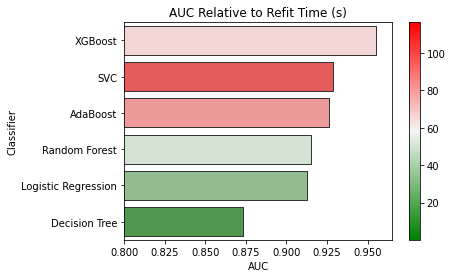

In [45]:
# Plot these data to see which model performed best, colored relative to model refit time
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()

In [46]:
# Show the final parameter settings for our best overall model
best_index = results.index[0]
models[best_index].best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.3, eval_metric='logloss', gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=345, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

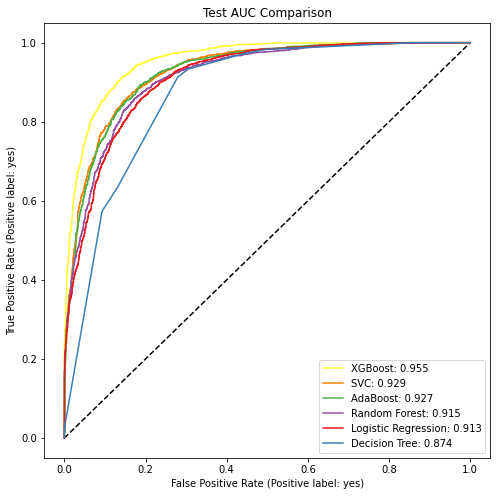

In [47]:
# ROC Curves
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       X_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

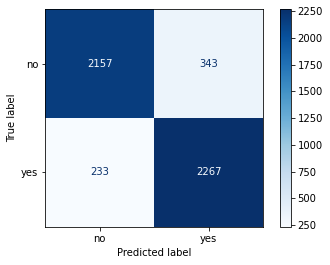

In [48]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      X_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd');

In [49]:
# Classification Report
print(classification_report(y_test, preds[best_index], digits = 3))

              precision    recall  f1-score   support

          no      0.903     0.863     0.882      2500
         yes      0.869     0.907     0.887      2500

    accuracy                          0.885      5000
   macro avg      0.886     0.885     0.885      5000
weighted avg      0.886     0.885     0.885      5000



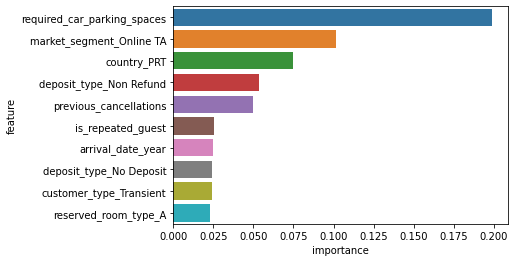

In [50]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional) -- note: for interpretation and potential caveats, see https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10));

<a id='rh-five'></a>

#### Performance of top and bottom 5% of predicted results

In [51]:
# Create a new data frame consisting of top and bottom 5 % of predicted results sorted by predicted probability
pred_full = pd.DataFrame(y_test)

In [52]:
pred_full['prediction_prob'] = probs[best_index]
pred_full['prediction'] = preds[best_index]

In [53]:
n = 5
pred_top = pred_full.sort_values('prediction_prob', ascending = False).head(int(len(pred_full)*(n/100)))
pred_tail = pred_full.sort_values('prediction_prob', ascending = False).tail(int(len(pred_full)*(n/100)))
pred_full = pd.concat([pred_top, pred_tail], ignore_index=False)

In [54]:
# Classification Report
print(classification_report(pred_full.is_canceled, pred_full.prediction, digits = 3))

              precision    recall  f1-score   support

          no      1.000     1.000     1.000       250
         yes      1.000     1.000     1.000       250

    accuracy                          1.000       500
   macro avg      1.000     1.000     1.000       500
weighted avg      1.000     1.000     1.000       500



<a id='rh-shap'></a>

#### SHAP

In [55]:
# Set our best model as model for SHAP
shap_model = models[best_index].estimator.fit(X_train, y_train)

In [56]:
explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(X_test)

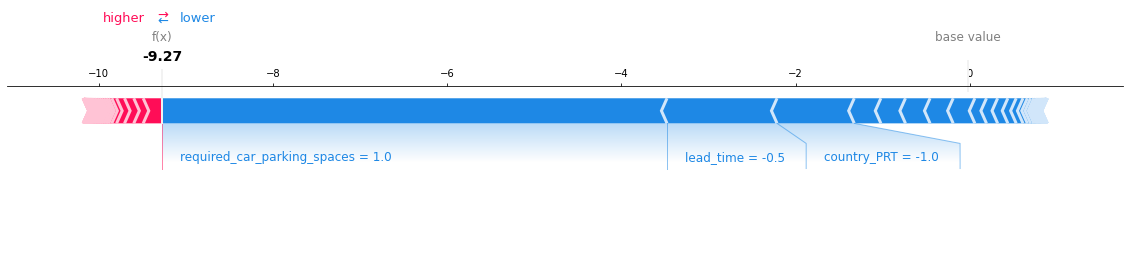

In [57]:
# Take a look at the 1004th record
shap.force_plot(explainer.expected_value, shap_values[1003,:], X_test.iloc[1003,:], matplotlib=True)

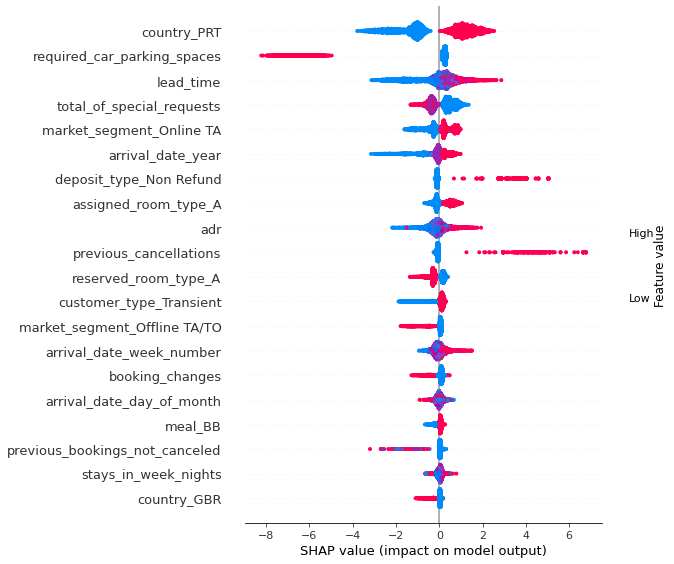

In [58]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

<a id='ch-ml'></a>

### Supervised Machine Learning (City Hotel)

In [59]:
# City hotel
# Subsample 20000 records to do the analysis
df_Sub = chDS.groupby('is_canceled').apply(lambda x: x.sample(10000, random_state = 345)).reset_index(drop=True)

In [60]:
df_Sub.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,month
0,City Hotel,no,342,2017,July,29,16,2,5,2,...,A,A,0,No Deposit,0,Transient,158.85,0,3,July
1,City Hotel,no,248,2017,July,30,25,0,2,2,...,F,F,0,No Deposit,0,Transient,188.10,1,0,July
2,City Hotel,no,208,2017,May,21,24,0,2,1,...,A,A,1,No Deposit,0,Transient-Party,91.50,0,0,May
3,City Hotel,no,58,2015,October,44,30,0,1,1,...,A,A,0,No Deposit,0,Contract,85.50,0,2,October
4,City Hotel,no,85,2015,September,37,9,0,2,1,...,A,D,0,No Deposit,0,Transient-Party,90.00,0,0,September


In [61]:
# Check if the data is balanced
df_Sub.groupby('is_canceled').size()

is_canceled
no     10000
yes    10000
dtype: int64

In [62]:
# Set 75% of the data as traning dataset and 25% as testing dataset
TrainDS, TestDS = train_test_split(df_Sub, 
                               stratify = df_Sub.is_canceled,
                               test_size = 0.25, 
                               random_state = 345)

In [63]:
TrainDS.groupby('is_canceled').size()

is_canceled
no     7500
yes    7500
dtype: int64

In [64]:
# Check NAs
round(1 - len(TrainDS.dropna())/len(TrainDS), 3)

0.0

In [65]:
# Encode all categorical (or non-continuous) data in the training data into binary columns using sklearn's OneHotEncoder 
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'is_canceled').select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names_out(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_Enc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_Enc.head(5)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
5393,no,57,2017,16,18,0,3,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18009,yes,300,2015,33,13,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18259,yes,81,2016,20,9,1,4,2,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10112,yes,294,2015,32,7,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11645,yes,194,2016,35,26,2,2,2,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Use sklearn's VarianceThreshold function to remove any columns from the training data that happen to have zero variance at this point.
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_Enc.drop(columns = 'is_canceled')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_EncSel = pd.concat([TrainDS_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_EncSel.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
5393,no,57,2017,16,18,0,3,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18009,yes,300,2015,33,13,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18259,yes,81,2016,20,9,1,4,2,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10112,yes,294,2015,32,7,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11645,yes,194,2016,35,26,2,2,2,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Use sklearn's RobustScaler to scale all of the training data (except the target variable).
scaler = RobustScaler()

sca_raw_data_train = TrainDS_EncSel.drop(columns = 'is_canceled')

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

TrainDS_EncSelSca = pd.concat([TrainDS_EncSel.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

TrainDS_EncSelSca.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
5393,no,-0.157534,1.0,-0.523810,0.133333,-0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18009,yes,1.506849,-1.0,0.285714,-0.200000,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18259,yes,0.006849,0.0,-0.333333,-0.466667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10112,yes,1.465753,-1.0,0.238095,-0.600000,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11645,yes,0.780822,0.0,0.380952,0.666667,0.5,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
TrainDS_EncSelSca.shape

(15000, 197)

In [69]:
# Repeat the same processes to the test data
enc_raw_data_test = TestDS.drop(columns = 'is_canceled').select_dtypes(include = ['object', 'category'])

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names_out(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

TestDS_Enc = pd.concat([TestDS.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)

In [70]:
sel_raw_data_test = TestDS_Enc.drop(columns = 'is_canceled')

selected_data_test = sel_raw_data_test.iloc[:, selector.get_support(indices = True)]

TestDS_EncSel = pd.concat([TestDS_Enc.drop(sel_raw_data_test.columns, axis = 1), selected_data_test], axis = 1)


In [71]:
sca_raw_data_test = TestDS_EncSel.drop(columns = 'is_canceled')

scaled_data_test = pd.DataFrame(scaler.transform(sca_raw_data_test))

scaled_data_test.columns = sca_raw_data_test.columns
scaled_data_test.index = sca_raw_data_test.index

TestDS_EncSelSca = pd.concat([TestDS_EncSel.drop(sca_raw_data_test.columns, axis = 1), scaled_data_test], axis = 1)

display(TestDS_EncSelSca.head(5), TestDS_EncSelSca.shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
2926,no,-0.547945,-1.0,0.285714,-0.333333,-0.5,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12136,yes,-0.321918,1.0,-0.904762,0.266667,0.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317,no,-0.404110,0.0,0.904762,-0.600000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9514,no,-0.452055,0.0,-0.285714,0.133333,-0.5,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1630,no,0.801370,0.0,0.238095,-1.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5000, 197)

In [72]:
# Make sure our data also has no infinite values
TrainDS_EncSelSca.replace(([np.inf, -np.inf], np.nan), inplace = True)
TrainDS_EncSelSca.fillna(0, inplace=True)
TestDS_EncSelSca.replace(([np.inf, -np.inf], np.nan), inplace = True)
TestDS_EncSelSca.fillna(0, inplace=True)

In [73]:
# set up data and labels
X_train = TrainDS_EncSelSca.drop(columns = 'is_canceled')
y_train = TrainDS_EncSelSca.is_canceled

X_test = TestDS_EncSelSca.drop(columns = 'is_canceled')
y_test = TestDS_EncSelSca.is_canceled

pos_label = 'yes'

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Logistic Regression', 'Decision Tree', 'AdaBoost', 'Random Forest', 'SVC', 'XGBoost']
classifiers = [LogisticRegression(random_state = 345, solver = 'liblinear'),
               DecisionTreeClassifier(random_state = 345), 
               AdaBoostClassifier(random_state = 345), 
               RandomForestClassifier(random_state = 345),
               SVC(random_state = 345, probability = True),
               XGBClassifier(random_state = 345, eval_metric = 'logloss')]
param_grids = [{'penalty': ['l1', 'l2']},
               {'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy']}, 
               {'n_estimators': [25, 50, 100, 150, 300]}, 
               {'max_depth': [2, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 150]},
               {'C': [0.5, 1], 'kernel': ['rbf', 'sigmoid']},
               {'eta': [0.1, 0.2, 0.3], 'gamma': [0, 0.1, 0.2]}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 6: Logistic Regression
Now working on model 2 of 6: Decision Tree
Now working on model 3 of 6: AdaBoost
Now working on model 4 of 6: Random Forest
Now working on model 5 of 6: SVC
Now working on model 6 of 6: XGBoost


/Users/ellingtonchen/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ellingtonchen/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ellingtonchen/opt/miniconda3/lib/python3.9/

Finished!


<a id='ch-mc'></a>

#### Model Comparison 

In [74]:
# Create a DataFrame of our results, sorted by the highest balanced accuracy/AUC score on the testing data
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values(['Balanced Accuracy', 'AUC'], ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
5,XGBoost,7.408,0.848,0.934
2,AdaBoost,11.341,0.812,0.900
0,Logistic Regression,0.278,0.799,0.891
4,SVC,158.331,0.795,0.876
3,Random Forest,1.950,0.780,0.874
1,Decision Tree,0.091,0.780,0.860


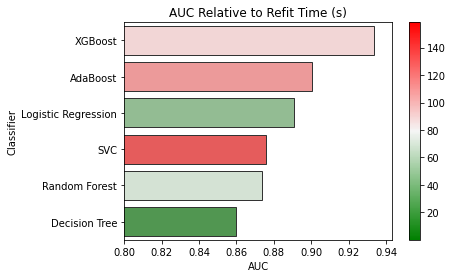

In [75]:
# Plot these data to see which model performed best, colored relative to model refit time
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()

In [76]:
# Show the final parameter settings for your best overall model
best_index = results.index[0]
models[best_index].best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.3, eval_metric='logloss', gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=345, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

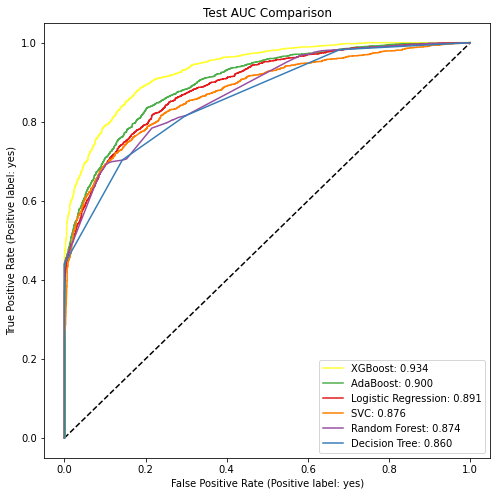

In [77]:
# ROC Curves
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       X_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

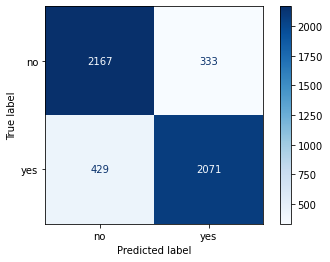

In [78]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      X_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd');

In [79]:
# Classification Report
print(classification_report(y_test, preds[best_index], digits = 3))

              precision    recall  f1-score   support

          no      0.835     0.867     0.850      2500
         yes      0.861     0.828     0.845      2500

    accuracy                          0.848      5000
   macro avg      0.848     0.848     0.848      5000
weighted avg      0.848     0.848     0.848      5000



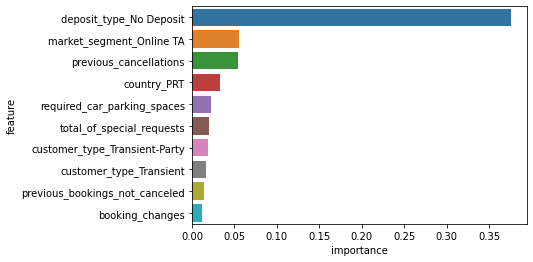

In [80]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional) -- note: for interpretation and potential caveats, see https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10));

<a id='ch-five'></a>

#### Performance of top and bottom 5% of predicted results

In [81]:
# Create a new data frame consisting of top and bottom 5 % of predicted results sorted by predicted probability
pred_full = pd.DataFrame(y_test)

In [82]:
pred_full['prediction_prob'] = probs[best_index]
pred_full['prediction'] = preds[best_index]

In [83]:
n = 5
pred_top = pred_full.sort_values('prediction_prob', ascending = False).head(int(len(pred_full)*(n/100)))
pred_tail = pred_full.sort_values('prediction_prob', ascending = False).tail(int(len(pred_full)*(n/100)))
pred_full = pd.concat([pred_top, pred_tail], ignore_index=False)

In [84]:
# Classification Report
print(classification_report(pred_full.is_canceled, pred_full.prediction, digits = 3))

              precision    recall  f1-score   support

          no      1.000     1.000     1.000       250
         yes      1.000     1.000     1.000       250

    accuracy                          1.000       500
   macro avg      1.000     1.000     1.000       500
weighted avg      1.000     1.000     1.000       500



<a id='ch-shap'></a>

#### SHAP

In [85]:
# Set our best model as model for SHAP
shap_model = models[best_index].estimator.fit(X_train, y_train)

In [86]:
explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(X_test)

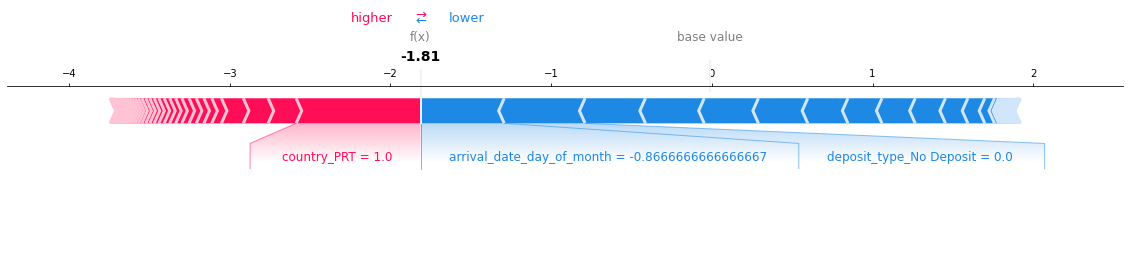

In [87]:
# Take a look at the 1004th record
shap.force_plot(explainer.expected_value, shap_values[1003,:], X_test.iloc[1003,:], matplotlib=True)

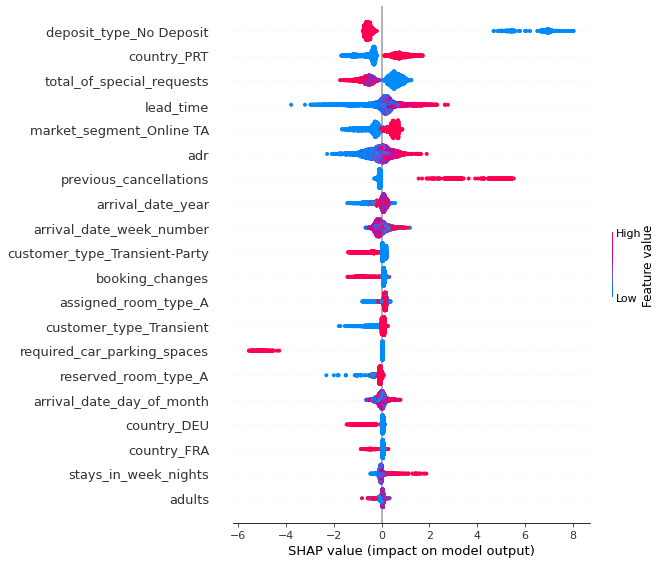

In [88]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test)